In [2]:
# Always run imports at the top level

import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots

In [3]:
import statsmodels.api as sm

In [4]:
# can import only a few items from library, keeping the namespace clean 
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 

In [5]:
from ISLP import load_data 
from ISLP.models import (ModelSpec as MS, 
                         summarize, 
                         poly)

In [6]:
# 'dir()' provides a list of objects in a namespace 
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [8]:
# all python objects have own notion of a namespace accessible with 'dir()'
# includes attributes of the object and any methods associated with object
# we see 'sum' in listing for array 
A = np.array([3, 5, 11])
dir(A) 

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [9]:
# indicates that object A.sum exits, it's a method that can be used to 
# compute the sum of array A, type A.sum? to see
A.sum?

Docstring:
a.sum(axis=None, dtype=None, out=None, keepdims=False, initial=0, where=True)

Return the sum of the array elements over the given axis.

Refer to `numpy.sum` for full documentation.

See Also
--------
numpy.sum : equivalent function
Type:      builtin_function_or_method

In [10]:
A.sum()

19

### Simple Linear Regression

We will construct model matrices (design matrices) using the `ModelSpec()` transform from `ISLP.models`. The `Boston` dataset records  `medv` (median house value) for `506` neighborhoods. We will predict `medv` using `13` predictos like `rmvar` (avg number of rooms per house), `age` (proportion of owner-occupied units built before 1940), and `lstat` (percent of households with low socioeconomic status). 

In [12]:
Boston = load_data("Boston") 
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [13]:
# to find out more about data 
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        ~/env/lib/python3.9/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This ali

In [14]:
# response is 'medv' and 'lstat' is single predictor
# can create the model matrix by hand
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [23]:
# response 
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

The `sm.OLS()` doesn't fit the model; it specifies the model, and then `model.fit()` does the fitting. 


The ISLP function `summarize()` outputs a table of parameter estimates, standard errors, and t-stats and p-values. The single argument that this object takes is `results` that is returned by `fit`. 

In [24]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


We may want to construct `X` with a more than one predictor, selected from an array or data frame. We may wish to transform the variables before fitting the model, specify the interactions between variables, and expand particular variables into sets of variables. The sklearn package has a particular notion for this task: a  `transform`. This object has two main methods: `fit()` and `transform()`. 

We first did this for the simple regression model using a single predictor `lstat` in the `Boston` data frame. The transform is created by the expression `design = MS(['lstat'])`. 

The `fit()` method takes the original array and does some initial computations on it, specified in the transform object. For example, if may compute means and standard deviations for centering and scaling. The `trasform()` method applies the fitted transformation to the array of data and produces the model matrix. 

In [25]:
design = MS(['lstat'])
# fit() checks variable 'lstat' specified in design exists in dataset 
design = design.fit(Boston)
# the transform() constructs the model matrix with two cols: 
# intercept and the variable lstat. 
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [26]:
# we can combine these two operations 
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


The object `results` has several methods that can be used for inference. Already presented a function `summarize()` to show the essentials of the fit. For a full and exhaustive summary of the fit, use the `summary()` method. 

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           5.08e-88
Time:                        15:36:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# can retrieve the fitted coefficients as the params attribute 
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

We can use the `get_prediction()` method to obtain predictions and produce conficence intervals and prediction intervals for the prediction of `medv` for fiven values of `lstat`. Let's first create a new dataframe containing `lstat` with values for which we want to make predictions. Then sue the `transform()` method to design a coresponding model matrix. 

In [29]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX 

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [30]:
# now compute the predictions use newX
new_predictions = results.get_prediction(newX)

In [32]:
new_predictions?

Type:        PredictionResults
String form: <statsmodels.regression._prediction.PredictionResults object at 0x3066c5610>
File:        ~/env/lib/python3.9/site-packages/statsmodels/regression/_prediction.py
Docstring:  
Results class for predictions.

Parameters
----------
predicted_mean : ndarray
    The array containing the prediction means.
var_pred_mean : ndarray
    The array of the variance of the prediction means.
var_resid : ndarray
    The array of residual variances.
df : int
    The degree of freedom used if dist is 't'.
dist : {'norm', 't', object}
    Either a string for the normal or t distribution or another object
    that exposes a `ppf` method.
row_labels : list[str]
    Row labels used in summary frame.

In [34]:
# view the predictions by extracting the predicted mean
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [35]:
# we can produce confidence intervals for predicted values 
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [36]:
# the prediction intervals can be computed by setting obs=True 
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

 For instance, the 95% confidence interval associated with an
 `lstat`  value of 10 is (24.47, 25.63), and the 95% prediction
interval is (12.82, 37.28).  As expected, the confidence and
prediction intervals are centered around the same point (a predicted
value of 25.05 for  `medv`  when  `lstat`  equals
10), but the latter are substantially wider.

In [37]:
def abline(ax, b, m): 
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)


Above we have `ax` known as the axis object for the existing plot, `b` is the intercept and `m` is the slope of the desired line. Let' include optional args, which can be passed into `ax.plot`

In [38]:
# *args allows any number of non-names args to abline
# *kwargs allows any number of named args (like linewidth=3)
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/var/folders/cq/40v2gwt15011mxywd0zkdwjh0000gn/T/ipykernel_65364/487027316.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/cq/40v2gwt15011mxywd0zkdwjh0000gn/T/ipykernel_65364/487027316.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


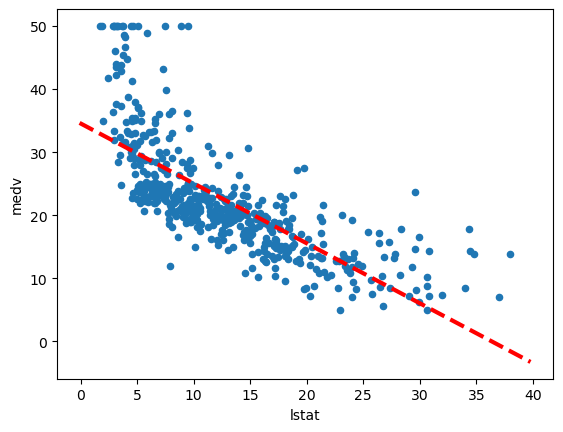

In [39]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, 
       results.params[0], 
       results.params[1], 
       'r--', 
       linewidth=3)


Next, let's examine the fitted values and residuals of the fit as attributes of the `results` object. We can also compute the influence measures describing the regression model with `get_influence()` method. 

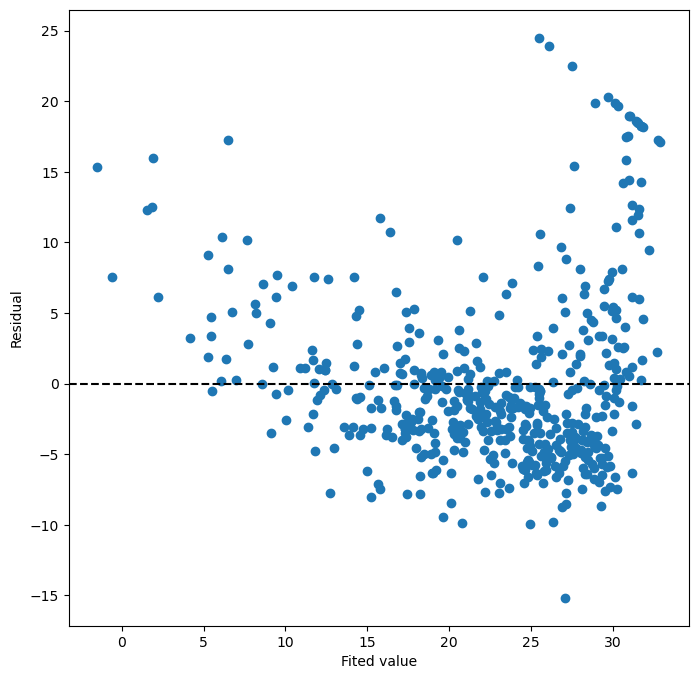

In [41]:
# ax is the second returned value of subplots()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fited value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--'); 


We added a horizontal line with ax.axhline(), made it black, and have a dashed linestyle. With the residual plot there is evience of non-linearity. The leverage stats can be computed for any number of predictors using `hat_matrix_diag` atribute of the value returned by the `get_influence()` method. 

374

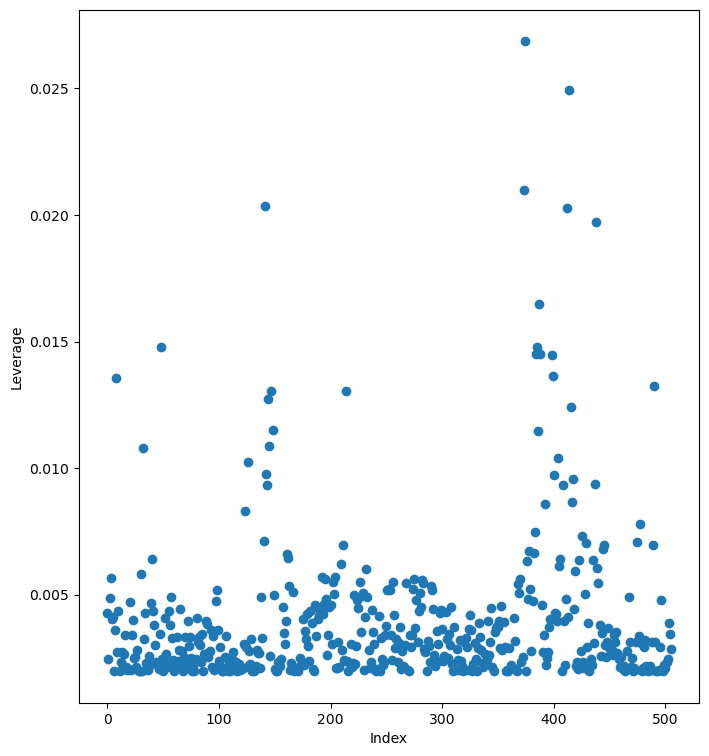

In [42]:
infl = results.get_influence()
ax = subplots(figsize=(8, 9))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


Here the `np.argmax()` identifies the index of the largest element of an array, optionally computed over the axis of the array. We used max to determine the observation with the largest leverage stat. 